## Note to the reader: YES there was a more succinct way to do this; I was in a hurry

In [133]:
import os
from csv import DictReader
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [104]:
expID = "1587920606898"
cond1 = "EQUAL_WEIGHTS"
cond2 = "PATIENT_WEIGHTS"
cond3 = "DONOR_PATIENT_WEIGHTS"
conds = [cond1, cond2, cond3]

In [105]:
# import data
directory = "./output"
data = {}

filename = cond1 + "_" + expID + ".csv"
data_file = open(os.path.join(directory, filename), "r")
dict_reader = DictReader(data_file)
data[cond1] = list(dict_reader)
data_file.close()

filename = cond2 + "_" + expID + ".csv"
data_file = open(os.path.join(directory, filename), "r")
dict_reader = DictReader(data_file)
data[cond2] = list(dict_reader)
data_file.close()

filename = cond3 + "_" + expID + ".csv"
data_file = open(os.path.join(directory, filename), "r")
dict_reader = DictReader(data_file)
data[cond3] = list(dict_reader)
data_file.close()

In [106]:
# csv headers
s1 = "Seen (Type 1)"
s2 = "Seen (Type 2)"
s3 = "Seen (Type 3)"
s4 = "Seen (Type 4)"
s5 = "Seen (Type 5)"
s6 = "Seen (Type 6)"
s7 = "Seen (Type 7)"
s8 = "Seen (Type 8)"
m1 = "Matched (Type 1)"
m2 = "Matched (Type 2)"
m3 = "Matched (Type 3)"
m4 = "Matched (Type 4)"
m5 = "Matched (Type 5)"
m6 = "Matched (Type 6)"
m7 = "Matched (Type 7)"
m8 = "Matched (Type 8)"
mr1 = "Matched (Rank 1)"
mr2 = "Matched (Rank 2)"
mr3 = "Matched (Rank 3)"
mr4 = "Matched (Rank 4)"
mr5 = "Matched (Rank 5)"
mr6 = "Matched (Rank 6)"
mr7 = "Matched (Rank 7)"
mr8 = "Matched (Rank 8)"

# dict keys
r1 = "rank1"
r2 = "rank2"
r3 = "rank3"
r4 = "rank4"
r5 = "rank5"
r6 = "rank6"
r7 = "rank7"
r8 = "rank8"
p1 = "prop1"
p2 = "prop2"
p3 = "prop3"
p4 = "prop4"
p5 = "prop5"
p6 = "prop6"
p7 = "prop7"
p8 = "prop8"

In [110]:
# extract rank and proportion metrics
metrics = {}
for cond in conds:
    rank1 = []
    rank2 = []
    rank3 = []
    rank4 = []
    rank5 = []
    rank6 = []
    rank7 = []
    rank8 = []
    
    prop1 = []
    prop2 = []
    prop3 = []
    prop4 = []
    prop5 = []
    prop6 = []
    prop7 = []
    prop8 = []
    
    for run in data[cond]:
        rank1.append(run[mr1])
        rank2.append(run[mr2])
        rank3.append(run[mr3])
        rank4.append(run[mr4])
        rank5.append(run[mr5])
        rank6.append(run[mr6])
        rank7.append(run[mr7])
        rank8.append(run[mr8])
        
        prop1.append(int(run[m1])/int(run[s1]))
        prop2.append(int(run[m2])/int(run[s2]))
        prop3.append(int(run[m3])/int(run[s3]))
        prop4.append(int(run[m4])/int(run[s4]))
        prop5.append(int(run[m5])/int(run[s5]))
        prop6.append(int(run[m6])/int(run[s6]))
        prop7.append(int(run[m7])/int(run[s7]))
        prop8.append(int(run[m8])/int(run[s8]))
            
    metrics[cond] = {}
    metrics[cond][r1] = rank1
    metrics[cond][r2] = rank2
    metrics[cond][r3] = rank3
    metrics[cond][r4] = rank4
    metrics[cond][r5] = rank5
    metrics[cond][r6] = rank6
    metrics[cond][r7] = rank7
    metrics[cond][r8] = rank8
    
    metrics[cond][p1] = prop1
    metrics[cond][p2] = prop2
    metrics[cond][p3] = prop3
    metrics[cond][p4] = prop4
    metrics[cond][p5] = prop5
    metrics[cond][p6] = prop6
    metrics[cond][p7] = prop7
    metrics[cond][p8] = prop8

In [145]:
# calc average ranks
avg_ranks = {}
for cond in conds:
    ranks = []
    for run in data[cond]:
        accum = 0
        count = 0
        
        accum += int(run[mr1])*1
        count += int(run[mr1])
        accum += int(run[mr2])*2
        count += int(run[mr2])
        accum += int(run[mr3])*3
        count += int(run[mr3])
        accum += int(run[mr4])*4
        count += int(run[mr4])
        accum += int(run[mr5])*5
        count += int(run[mr5])
        accum += int(run[mr6])*6
        count += int(run[mr6])
        accum += int(run[mr7])*7
        count += int(run[mr7])
        accum += int(run[mr8])*8
        count += int(run[mr8])
        
        avg = accum/count
        ranks.append(avg)
    avg_ranks[cond] = ranks
        
for cond in list(avg_ranks):
    print(cond, np.average(np.asarray(avg_ranks[cond])))

EQUAL_WEIGHTS 4.0612250860771715
PATIENT_WEIGHTS 3.6555136058215094
DONOR_PATIENT_WEIGHTS 3.2444347970972514


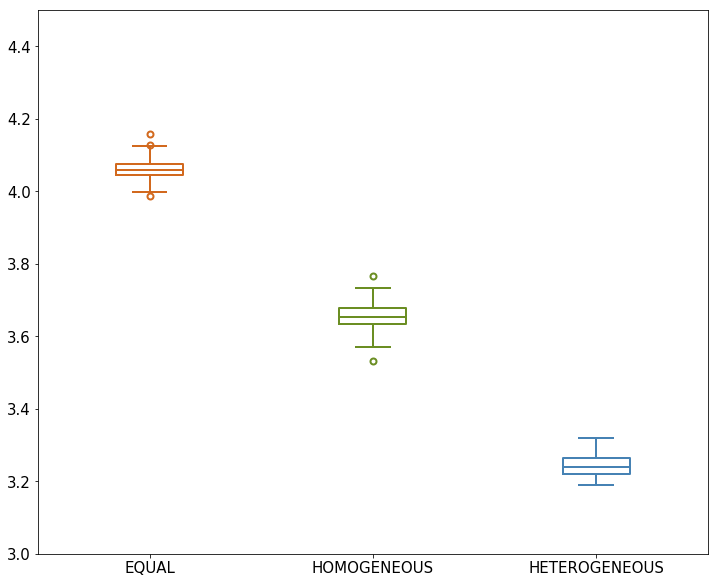

In [178]:
# plot rank by condition
x = ['EQUAL', 'HOMOGENEOUS', 'HETEROGENEOUS']
y = [avg_ranks[cond1], avg_ranks[cond2], avg_ranks[cond3]]

fig = plt.figure(1, figsize=(12, 10))
ax = fig.add_subplot(111)
bp = ax.boxplot(y)
ax.set_xticklabels(x)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,3,4.5))

# set colors
colors = ['chocolate', 'olivedrab', 'steelblue']
indices = [0, 2, 4]
for i in range(len(x)):
    bp['boxes'][i].set(color=colors[i], linewidth=2)
    bp['medians'][i].set(color=colors[i], linewidth=2)
    bp['fliers'][i].set(markeredgecolor=colors[i], markeredgewidth=2)
    bp['caps'][indices[i]].set(color=colors[i], linewidth=2)
    bp['caps'][indices[i]+1].set(color=colors[i], linewidth=2)
    bp['whiskers'][indices[i]].set(color=colors[i], linewidth=2)
    bp['whiskers'][indices[i]+1].set(color=colors[i], linewidth=2)
    

/Users/Rachel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/Rachel/.local/lib/python3.7/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/Rachel/.local/lib/python3.7/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


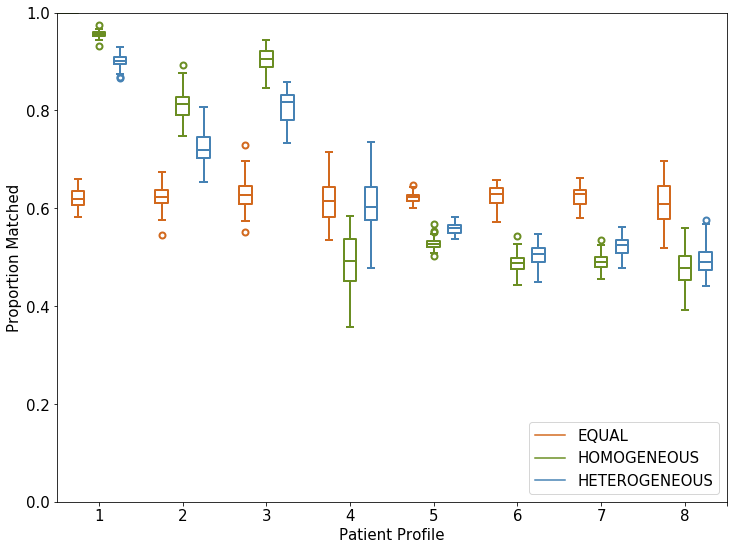

In [177]:
# plot proportion matched by condition and profile type
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes

matplotlib.rcParams.update({'font.size': 15})


# function for setting the colors of the box plots pairs
def setBoxColors(bp):
    color1 = 'chocolate'
    color2 = 'olivedrab'
    color3 = 'steelblue'
    
    setp(bp['boxes'][0], color=color1, linewidth=2)
    setp(bp['caps'][0], color=color1, linewidth=2)
    setp(bp['caps'][1], color=color1, linewidth=2)
    setp(bp['whiskers'][0], color=color1, linewidth=2)
    setp(bp['whiskers'][1], color=color1, linewidth=2)
    setp(bp['fliers'][0], markeredgecolor=color1, markeredgewidth=2)
    setp(bp['medians'][0], color=color1, linewidth=2)

    setp(bp['boxes'][1], color=color2, linewidth=2)
    setp(bp['caps'][2], color=color2, linewidth=2)
    setp(bp['caps'][3], color=color2, linewidth=2)
    setp(bp['whiskers'][2], color=color2, linewidth=2)
    setp(bp['whiskers'][3], color=color2, linewidth=2)
    plt.setp(bp['fliers'][1], markeredgecolor=color2, markeredgewidth=2)
    setp(bp['medians'][1], color=color2, linewidth=2)
    
    setp(bp['boxes'][2], color=color3, linewidth=2)
    setp(bp['caps'][4], color=color3, linewidth=2)
    setp(bp['caps'][5], color=color3, linewidth=2)
    setp(bp['whiskers'][4], color=color3, linewidth=2)
    setp(bp['whiskers'][5], color=color3, linewidth=2)
    plt.setp(bp['fliers'][2], markeredgecolor=color3, markeredgewidth=2)
    setp(bp['fliers'][2], color=color3, linewidth=2)
    setp(bp['medians'][2], color=color3, linewidth=2)
    
fig = figure(1, figsize=(12, 9))
ax = axes()
hold(True)

prof1 = [metrics[cond1][p1], metrics[cond2][p1], metrics[cond3][p1]]
prof2 = [metrics[cond1][p2], metrics[cond2][p2], metrics[cond3][p2]]
prof3 = [metrics[cond1][p3], metrics[cond2][p3], metrics[cond3][p3]]
prof4 = [metrics[cond1][p4], metrics[cond2][p4], metrics[cond3][p4]]
prof5 = [metrics[cond1][p5], metrics[cond2][p5], metrics[cond3][p5]]
prof6 = [metrics[cond1][p6], metrics[cond2][p6], metrics[cond3][p6]]
prof7 = [metrics[cond1][p7], metrics[cond2][p7], metrics[cond3][p7]]
prof8 = [metrics[cond1][p8], metrics[cond2][p8], metrics[cond3][p8]]

m = 2
bp = boxplot(prof1, positions = [m-1, m, m+1], widths = 0.6)
setBoxColors(bp)
m += 4
bp = boxplot(prof2, positions = [m-1, m, m+1], widths = 0.6)
setBoxColors(bp)
m += 4
bp = boxplot(prof3, positions = [m-1, m, m+1], widths = 0.6)
setBoxColors(bp)
m += 4
bp = boxplot(prof4, positions = [m-1, m, m+1], widths = 0.6)
setBoxColors(bp)
m += 4
bp = boxplot(prof5, positions = [m-1, m, m+1], widths = 0.6)
setBoxColors(bp)
m += 4
bp = boxplot(prof6, positions = [m-1, m, m+1], widths = 0.6)
setBoxColors(bp)
m += 4
bp = boxplot(prof7, positions = [m-1, m, m+1], widths = 0.6)
setBoxColors(bp)
m += 4
bp = boxplot(prof8, positions = [m-1, m, m+1], widths = 0.6)
setBoxColors(bp)

# set axes limits and labels
xlim(0,1)
ylim(0,1)
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, ''])
ax.set_xticks([2, 6, 10, 14, 18, 22, 26, 30, m+2])
ax.set_xlabel('Patient Profile')
ax.set_ylabel('Proportion Matched')

# draw temporary red and blue lines and use them to create a legend
hB, = plot([1,1], color='chocolate', linestyle='-')
hG, = plot([1,1], color='olivedrab', linestyle='-')
hR, = plot([1,1], color='steelblue', linestyle='-')
legend((hB, hG, hR),('EQUAL', 'HOMOGENEOUS', 'HETEROGENEOUS'), loc=4)
hB.set_visible(False)
hR.set_visible(False)

show()
